# HCAHPS PATIENT SURVEY ANALYSIS

##### Project data credit and link

link to project dataset:
https://mavenanalytics.io/data-playground

dataset name: HCAHPS Patient Survey

In [2]:
# loading required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# setting the float format to display to 0 decimal places
pd.options.display.float_format = '{:.0f}'.format

### LOADING THE DATASET(S)

#### 1) STATES DATASET

In [3]:
# reading the data
ds_States = pd.read_csv("data/states.csv")

# analysing the data
ds_States.info()
# three columns: State, State Name and Region (all object datatypes)
# 51 rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State       51 non-null     object
 1   State Name  51 non-null     object
 2   Region      51 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [4]:
# checking for nulls
ds_States.isnull().sum()
# no nulls in any of the columns


State         0
State Name    0
Region        0
dtype: int64

In [5]:
# converting State column (primary key) to a categorical variable or factor
ds_States["State"] = ds_States["State"].astype("category")

#checking the datatype
ds_States.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   State       51 non-null     category
 1   State Name  51 non-null     object  
 2   Region      51 non-null     object  
dtypes: category(1), object(2)
memory usage: 3.4+ KB


#### 2) MEASURES DATASET

In [6]:
# reading the data
ds_Measures = pd.read_csv("data/measures.csv")

# analysing the data 

ds_Measures.info()
# three columns: Measure ID, Measure and Type (all object datatypes)
# 10 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Measure ID  10 non-null     object
 1   Measure     10 non-null     object
 2   Type        10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


In [7]:
# checking for null values in the column
ds_Measures.isnull().sum()
# no nulls in any of the columns


Measure ID    0
Measure       0
Type          0
dtype: int64

In [8]:
# converting the Measure ID (primary key) to a categorical variable
ds_Measures["Measure ID"] = ds_Measures["Measure ID"].astype("category")

ds_Measures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Measure ID  10 non-null     category
 1   Measure     10 non-null     object  
 2   Type        10 non-null     object  
dtypes: category(1), object(2)
memory usage: 678.0+ bytes


#### 3) NATIONAL RESULTS DATASET

In [9]:
# reading in the data
ds_NationalResults = pd.read_csv("data/national_results.csv")

ds_NationalResults.info()
# 5 columns: Release Period (obj), Measure ID (obj), Bottom-box Percentage (int), Middle-box Percentage (int), 
# Top-box Percentage(int)
# 90 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Release Period         90 non-null     object
 1   Measure ID             90 non-null     object
 2   Bottom-box Percentage  90 non-null     int64 
 3   Middle-box Percentage  90 non-null     int64 
 4   Top-box Percentage     90 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 3.6+ KB


In [10]:
# checking for null values
ds_NationalResults.isnull().sum()
# no nulls in any of the columns


Release Period           0
Measure ID               0
Bottom-box Percentage    0
Middle-box Percentage    0
Top-box Percentage       0
dtype: int64

In [11]:
# converting Release Period and Measure ID into categorical variables

ds_NationalResults['Release Period']  = ds_NationalResults['Release Period'].astype('category')
ds_NationalResults['Measure ID']  = ds_NationalResults['Measure ID'].astype('category')

ds_NationalResults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Release Period         90 non-null     category
 1   Measure ID             90 non-null     category
 2   Bottom-box Percentage  90 non-null     int64   
 3   Middle-box Percentage  90 non-null     int64   
 4   Top-box Percentage     90 non-null     int64   
dtypes: category(2), int64(3)
memory usage: 3.1 KB


#### 4) QUESTIONS DATASET

In [12]:
# dataset 4: questions
ds_Questions = pd.read_csv("data/questions.csv")

# analysing the data
ds_Questions.info()
# 6 columns: Question Num (int), Measure ID (obj), Question (obj), Bottom-box Answer (obj), 
# Middle-box Answer (obj),  Top-box Answer (obj)
# 19 rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Question Num       19 non-null     int64 
 1   Measure ID         19 non-null     object
 2   Question           19 non-null     object
 3   Bottom-box Answer  19 non-null     object
 4   Middle-box Answer  17 non-null     object
 5   Top-box Answer     19 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.0+ KB


In [13]:
# checking for null values
ds_Questions.isnull().sum()
# 2 null values in middle-box answer column

# checking which rows have null values
ds_Questions.loc[ds_Questions["Middle-box Answer"].isnull()]
# rows 12 and 13, questions 16 and 17


,Question Num,Measure ID,Question,Bottom-box Answer,Middle-box Answer,Top-box Answer
12,16,H_COMP_6,"During this hospital stay, did doctors, nurses...",No,NaN,Yes
13,17,H_COMP_6,"During this hospital stay, did you get informa...",No,NaN,Yes


In [14]:
# converting Question Num and Measure ID to categorical datatype
ds_Questions["Question Num"] = ds_Questions["Question Num"].astype("category")
ds_Questions["Measure ID"] = ds_Questions["Measure ID"].astype("category")

ds_Questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Question Num       19 non-null     category
 1   Measure ID         19 non-null     category
 2   Question           19 non-null     object  
 3   Bottom-box Answer  19 non-null     object  
 4   Middle-box Answer  17 non-null     object  
 5   Top-box Answer     19 non-null     object  
dtypes: category(2), object(4)
memory usage: 1.8+ KB


#### 5) REPORTS DATASET

In [15]:
ds_Reports = pd.read_csv("data/reports.csv")

# analysing the dataset 

ds_Reports.info()
# 3 columns: Release Period (obj), Start Date (obj), End Date (obj)
# 9 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Release Period  9 non-null      object
 1   Start Date      9 non-null      object
 2   End Date        9 non-null      object
dtypes: object(3)
memory usage: 344.0+ bytes


In [16]:
ds_Reports.isnull().sum()
# no null values in any of the columns


Release Period    0
Start Date        0
End Date          0
dtype: int64

In [17]:
# converting release period into a categorical variable

ds_Reports["Release Period"] = ds_Reports["Release Period"].astype("category")

ds_Reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Release Period  9 non-null      category
 1   Start Date      9 non-null      object  
 2   End Date        9 non-null      object  
dtypes: category(1), object(2)
memory usage: 653.0+ bytes


#### 6) RESPONSES DATASET

In [18]:
ds_Responses = pd.read_csv("data/responses.csv")

# analysing the dataset
ds_Responses.info()
# 5 columns: Release Period, State, Facility ID, Completed Surveys, Response Rate (all object datatypes)
# 43219 rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43219 entries, 0 to 43218
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Release Period     43219 non-null  object
 1   State              43219 non-null  object
 2   Facility ID        43219 non-null  object
 3   Completed Surveys  43219 non-null  object
 4   Response Rate (%)  43219 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


In [19]:
ds_Responses.isnull().sum()
# no null values in any of the columns


Release Period       0
State                0
Facility ID          0
Completed Surveys    0
Response Rate (%)    0
dtype: int64

In [20]:
# converting Release Period and State to categorical variables

ds_Responses["Release Period"] = ds_Responses["Release Period"].astype("category")
ds_Responses["State"] = ds_Responses["State"].astype("category")

ds_Responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43219 entries, 0 to 43218
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Release Period     43219 non-null  category
 1   State              43219 non-null  category
 2   Facility ID        43219 non-null  object  
 3   Completed Surveys  43219 non-null  object  
 4   Response Rate (%)  43219 non-null  object  
dtypes: category(2), object(3)
memory usage: 1.1+ MB


#### 7) STATE RESULTS DATASET

In [21]:
ds_StateResults = pd.read_csv("data/state_results.csv")

# analysing the dataset

ds_StateResults.info()
# 6 columns: Release Period(obj), state (obj), Measure ID(obj), Bottom-box Percentage (int), 
# Middle-box Percentage (int), Top-box Percentage(int)
# 4580 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4580 entries, 0 to 4579
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Release Period         4580 non-null   object
 1   State                  4580 non-null   object
 2   Measure ID             4580 non-null   object
 3   Bottom-box Percentage  4580 non-null   int64 
 4   Middle-box Percentage  4580 non-null   int64 
 5   Top-box Percentage     4580 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 214.8+ KB


In [22]:
# checking for null values
ds_StateResults.isnull().sum()
# no null values in any of the columns


Release Period           0
State                    0
Measure ID               0
Bottom-box Percentage    0
Middle-box Percentage    0
Top-box Percentage       0
dtype: int64

In [23]:
# converting Release Period, State and Measure ID columns into catgeorical values
ds_StateResults["Release Period"] = ds_StateResults["Release Period"].astype("category")
ds_StateResults["State"] = ds_StateResults["State"].astype("category")
ds_StateResults["Measure ID"] = ds_StateResults["Measure ID"].astype("category")


ds_StateResults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4580 entries, 0 to 4579
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Release Period         4580 non-null   category
 1   State                  4580 non-null   category
 2   Measure ID             4580 non-null   category
 3   Bottom-box Percentage  4580 non-null   int64   
 4   Middle-box Percentage  4580 non-null   int64   
 5   Top-box Percentage     4580 non-null   int64   
dtypes: category(3), int64(3)
memory usage: 124.1 KB


## ANALYSING DATASETS

### ANALYSING QUESTIONS DATASETS

Merging measures and questions datasets to understand what measures were surveyed and what questions were asked in the survey

In [24]:
ds_Measure_Questions = pd.merge(left=ds_Measures, right=ds_Questions, how="inner", 
                                left_on="Measure ID", right_on="Measure ID")


ds_Measure_Questions.head(5)

,Measure ID,Measure,Type,Question Num,Question,Bottom-box Answer,Middle-box Answer,Top-box Answer
0,H_COMP_1,Communication with Nurses,Composite Measure,1,"During this hospital stay, how often did nurse...",Sometimes or never,Usually,Always
1,H_COMP_1,Communication with Nurses,Composite Measure,2,"During this hospital stay, how often did nurse...",Sometimes or never,Usually,Always
2,H_COMP_1,Communication with Nurses,Composite Measure,3,"During this hospital stay, how often did nurse...",Sometimes or never,Usually,Always
3,H_COMP_2,Communication with Doctors,Composite Measure,5,"During this hospital stay, how often did docto...",Sometimes or never,Usually,Always
4,H_COMP_2,Communication with Doctors,Composite Measure,6,"During this hospital stay, how often did docto...",Sometimes or never,Usually,Always


In [25]:
ds_Measure_Questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Measure ID         19 non-null     category
 1   Measure            19 non-null     object  
 2   Type               19 non-null     object  
 3   Question Num       19 non-null     category
 4   Question           19 non-null     object  
 5   Bottom-box Answer  19 non-null     object  
 6   Middle-box Answer  17 non-null     object  
 7   Top-box Answer     19 non-null     object  
dtypes: category(2), object(6)
memory usage: 2.1+ KB


Checking how many measures there are and the total number of questions in each


In [26]:
ds_Measure_Questions["Measure ID"].value_counts()


H_COMP_1        3
H_COMP_2        3
H_COMP_7        3
H_COMP_3        2
H_COMP_5        2
H_COMP_6        2
H_CLEAN_HSP     1
H_HSP_RATING    1
H_QUIET_HSP     1
H_RECMND        1
Name: Measure ID, dtype: int64

In [27]:
# displaying each measure and the number of questions in each
ds_Measure_Questions.pivot_table(index=["Measure"], values = "Question Num",
                                     aggfunc="count",sort = True, margins=True)

# 10 measures listed, 19 questions


,Question Num
Measure,
Care Transition,3
Cleanliness of Hospital Environment,1
Communication about Medicines,2
Communication with Doctors,3
Communication with Nurses,3
Discharge Information,2
Overall Hospital Rating,1
Quietness of Hospital Environment,1
Responsiveness of Hospital Staff,2


There are a total of 10 measures in this survey, with the number of questions in each measure ranging from 1 to a maximum of 3 
(19 questions in total)

In [28]:
# getting only the measure and questions 
df_Questions_per_Measure = ds_Measure_Questions[['Measure','Question']]
df_Questions_per_Measure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Measure   19 non-null     object
 1   Question  19 non-null     object
dtypes: object(2)
memory usage: 456.0+ bytes


#### Printing the questions by measure

In [29]:
Measure_Name = ""


for index in range(len(df_Questions_per_Measure)):
    
    if ((len(Measure_Name) == 0 ) | (Measure_Name != df_Questions_per_Measure.loc[index]['Measure'])):
        print("\n")
        print(df_Questions_per_Measure.loc[index]['Measure'].upper())
        print("------------------------------------")
        print(df_Questions_per_Measure.loc[index]['Question'] + "\n")

        # setting the measure name
        Measure_Name = df_Questions_per_Measure.loc[index]['Measure']
    
    else:
        print(df_Questions_per_Measure.loc[index]['Question'] + "\n")



COMMUNICATION WITH NURSES
------------------------------------
During this hospital stay, how often did nurses treat you with courtesy and respect? 

During this hospital stay, how often did nurses listen carefully to you? 

During this hospital stay, how often did nurses explain things in a way you could understand? 



COMMUNICATION WITH DOCTORS
------------------------------------
During this hospital stay, how often did doctors treat you with courtesy and respect? 

During this hospital stay, how often did doctors listen carefully to you? 

During this hospital stay, how often did doctors explain things in a way you could understand? 



RESPONSIVENESS OF HOSPITAL STAFF
------------------------------------
During this hospital stay, after you pressed the call button, how often did you get help as soon as you wanted it? 

How often did you get help in getting to the bathroom or in using a bedpan as soon as you wanted? 



COMMUNICATION ABOUT MEDICINES
-----------------------------

### ANALYSING NATIONAL RESULTS DATASET

Merging 'measure' column from the Measures table to the National Results table (so that we can have the full name of the measure)

In [30]:
# only merging 1 column
df_Measure_Nations = pd.merge(ds_NationalResults, ds_Measures[['Measure ID', 'Measure']], on='Measure ID', how='left')

df_Measure_Nations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Release Period         90 non-null     category
 1   Measure ID             90 non-null     category
 2   Bottom-box Percentage  90 non-null     int64   
 3   Middle-box Percentage  90 non-null     int64   
 4   Top-box Percentage     90 non-null     int64   
 5   Measure                90 non-null     object  
dtypes: category(2), int64(3), object(1)
memory usage: 4.4+ KB


In [31]:
df_Measure_Nations.sort_values(by=["Measure ID", "Release Period"]).head(5)

,Release Period,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage,Measure
0,07_2015,H_CLEAN_HSP,8,18,74,Cleanliness of Hospital Environment
10,07_2016,H_CLEAN_HSP,8,18,74,Cleanliness of Hospital Environment
20,07_2017,H_CLEAN_HSP,8,18,74,Cleanliness of Hospital Environment
30,07_2018,H_CLEAN_HSP,8,17,75,Cleanliness of Hospital Environment
40,07_2019,H_CLEAN_HSP,7,18,75,Cleanliness of Hospital Environment


In [32]:
# grouping based on measure and release date

df_Measure_Nations.sort_values(["Measure ID", "Release Period"],
                               ascending=[True, True]).groupby(["Measure ID", 
                                                                "Release Period"]).sum(numeric_only=True)


Bottom-box Percentage  Middle-box Percentage  \
Measure ID  Release Period                                                 
H_CLEAN_HSP 07_2015                             8                     18   
            07_2016                             8                     18   
            07_2017                             8                     18   
            07_2018                             8                     17   
            07_2019                             7                     18   
...                                           ...                    ...   
H_RECMND    07_2019                             5                     23   
            07_2020                             5                     23   
            07_2021                             5                     23   
            07_2022                             6                     23   
            07_2023                             6                     25   

                            Top-box Percentage  
Measure ID  Release Period                      
H_CLEAN_HSP 07_2015                         74  
            07_2016                         74  
            07_2017                         74  
            07_2018                         75  
            07_2019                         75  
...                                        ...  
H_RECMND    07_2019                         72  
            07_2020                         72  
            07_2021                         72  
            07_2022                         71  
            07_2023                         69  

[90 rows x 3 columns]

#### Graphical analysis of measure and result percentage

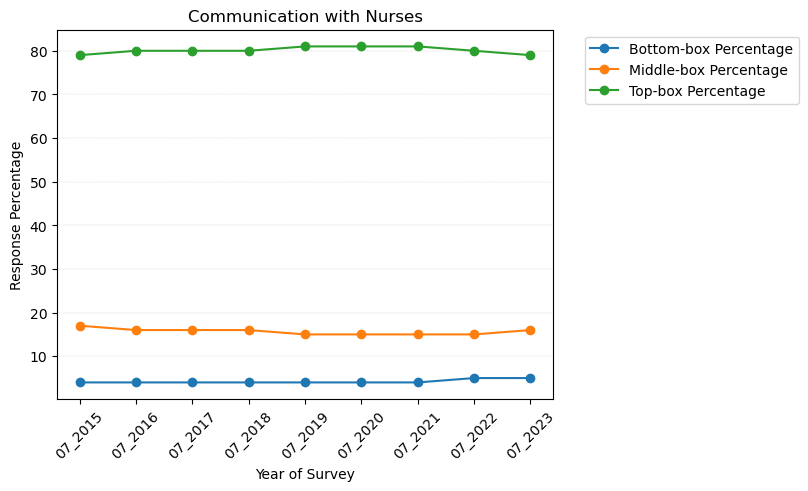

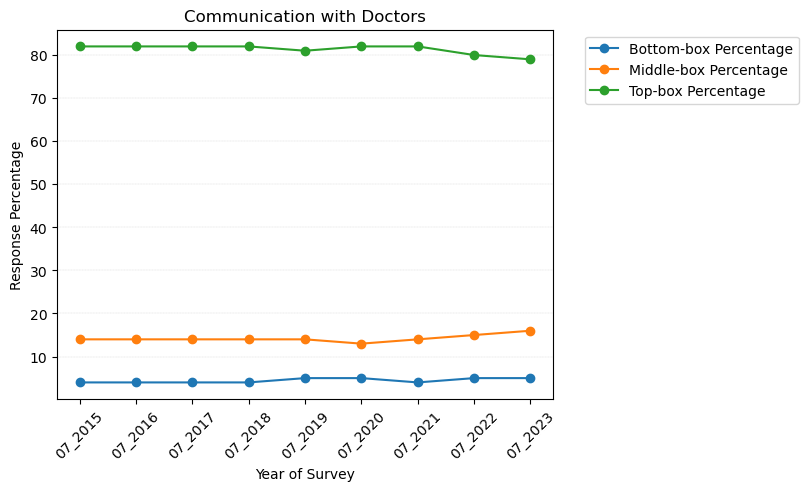

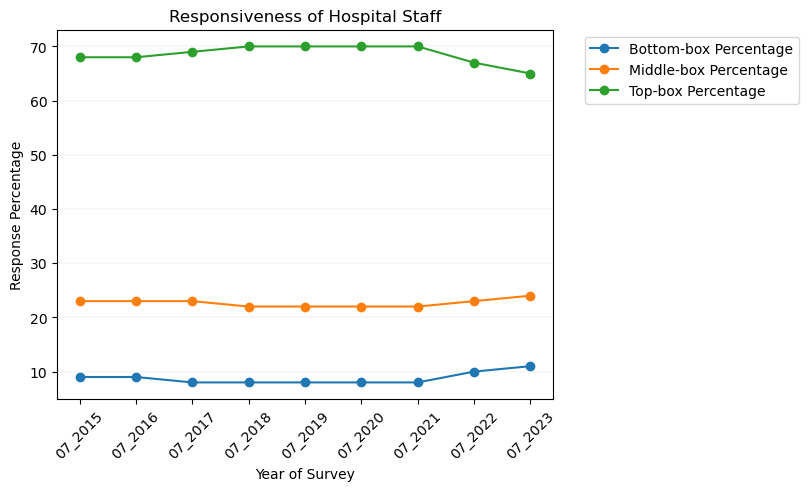

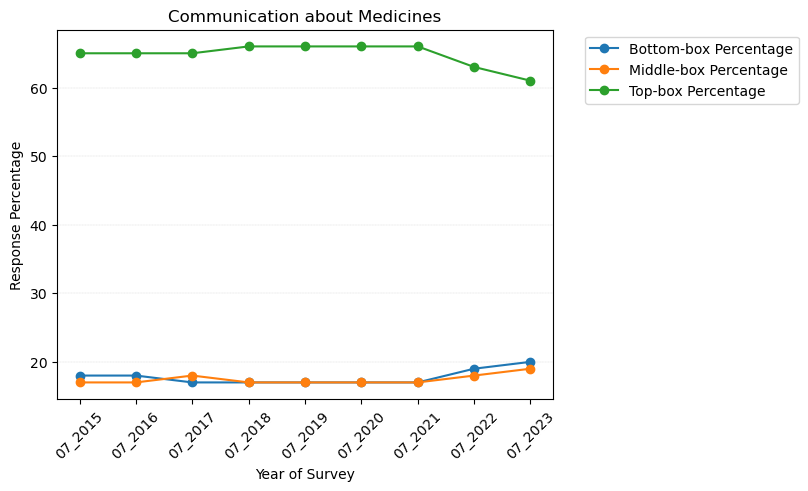

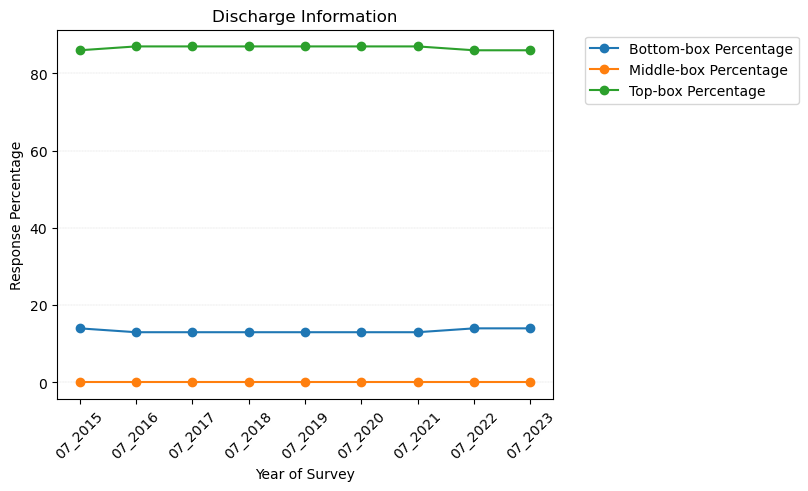

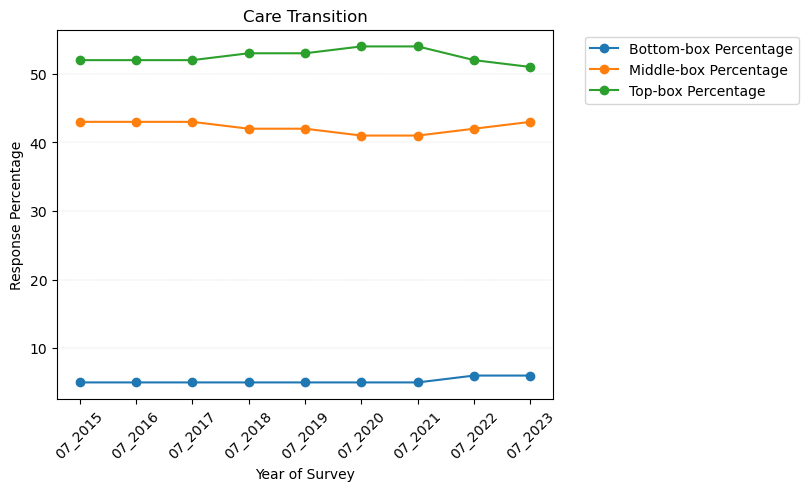

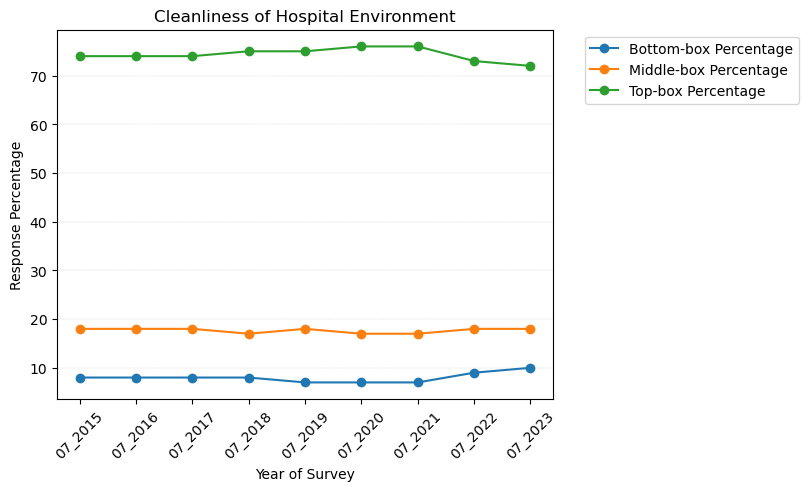

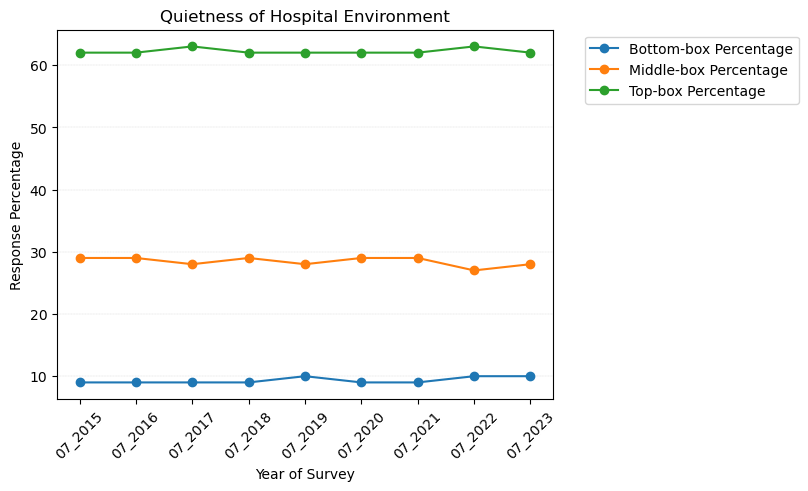

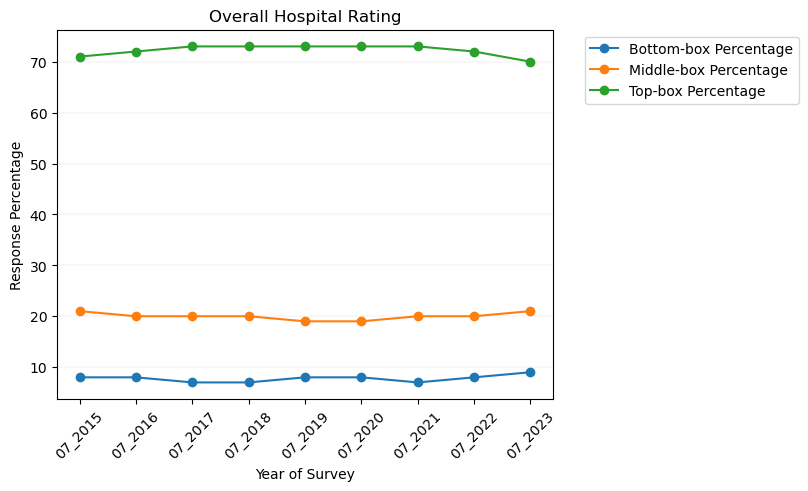

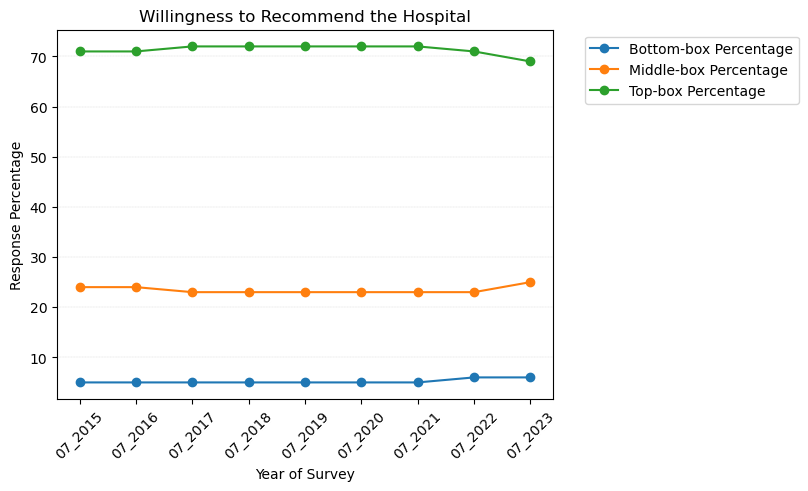

In [33]:
#defining a function to print the data

def ShowData(data, MeasureName):
   
    data.plot(x='Release Period', y= ['Bottom-box Percentage', 'Middle-box Percentage','Top-box Percentage'],  
                       legend=True, title = MeasureName, marker='o', linestyle='solid')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel("Year of Survey")
    plt.ylabel("Response Percentage")
    plt.grid(axis = 'y', color = 'gray', linestyle = 'dotted', linewidth = 0.2)
    plt.show()
    return


df_subset = pd.DataFrame()

#temporary variables 
current_Measure = ""
current_MeasureID = ""

for index in range (len(ds_Measures)):
   
    # getting the measure and ID from the current index
    current_MeasureID = ds_Measures.iloc[index]['Measure ID']
    current_Measure = ds_Measures.iloc[index]['Measure']
    
    
    # getting all data for the current measure from the national results dataset
    df_subset = df_Measure_Nations.loc[df_Measure_Nations["Measure ID"] == current_MeasureID]
    
   
    # calling the showData function to display the data
    ShowData(df_subset, current_Measure)
    print("\n\n")

#### ANALYSIS OF NATIONAL RESULTS

###### COMMUNCIATON WITH NURSES

* Bottom-box percentage is very low and is more or less consistent from 2015 to 2023
* This means that a very small percentage (4-5%) of the respondents gave a low score for this measure
* Middle-box percentage is more than 14 and but less than 20.  It is more or less consistent from 2015 to 2023
* This means less than 20% of the respondents gave a middle score for this measure
* Top-box percentage is around 80% and seems to be consistent between 2015 to 2023
* This means 80% of the respondents have given a high rating for this measure


###### COMMUNCIATON WITH DOCTORS

* Bottom-box percentage is low (around 5%) and shows slight elevation in 2019, 2020 and then again in 2022 and 2023
* This means that a small percentage (5-6%) of the respondents gave a low score for this measure
* Middle-box percentage is around the 15% mark between 2015 to 2020, however it slowly increases from 2021 to 2023 (being around 18% in 2023)
* This shows that less than 20% of the respondents gave a middle score for this measure.  This has increase from 15% to 18% between 2020 and 2023.
* Top-box percentage is has been above 80% consistently between 2015 and 2020. However, we do is a slight decrease (to 80% and less) from 2022 to 2023.
* This means 80% of the respondents gave a high rating for this measure


###### RESPONSIVENESS OF HOSPITAL STAFF

* Bottom-box percentage is around 10% between 2015 to 2016, however, we do see a significant decrease from 2017 to 2021.  Furthermore, there is a significant increase in percentage from 2021 (below 10%) to 2023 (above 10%).
* This means that a 10% or more of the respondents gave a low score for this measure.
* Middle-box percentage is above 20% and has remained more or less consistent throughout. Although, there is a slight increase from 2021 to 2023.
* This shows that move than 20% of the respondents gave a middle score for this measure.  This has increase from 21% to 24% between 2021 and 2023.
* Top-box percentage was below 70% from 2015 to 2017, however, it remained constant at 70% from 2018 to 2021.  The percentage has shown a significant decrease between 2021 and 2023.
* This means less than 70% of the respondents gave a high rating for this measure


###### COMMUNCIATON ABOUT MEDICINES

* Bottom-box percentage is high (below 20%).  There is a decrease in this percentage from 2017 to 2021, however, we see a sharp increase again after 2021 (again reaching 20% in 2023).
* This means that a significant percentage of the respondents (20%) gave a low score for this measure.
* Middle-box percentage is very low for this measure.  It is around 10% from 2015 to 2021.  There is a sharp improvement from 2021 to 2023 (reaching 20%).
* This means less than 20% of the respondents gave a middle score for this measure
* Top-box percentage has been relatively consistent (around 65-67%) from 2015 to 2021.  However, there is a sharp decrease from 2021 to 2023, bring this percentage down to almost 60%.
* This means 60-65% of the respondents have given a high rating for this measure


###### DISCHARGE INFORMATION

* Bottom-box percentage is around 18% and has been consistent from 2015 to 2023
* This means that 18% of the respondents gave a low/bottom score for this measure
* Middle-box percentage is 0 throughout.
* This means that no respondents gave a middle score for this measure
* Top-box percentage is well above 80% and is consistent from 2015 to 2023
* This means more than 80% of the respondents have given a high rating for this measure


###### CARE TRANSITION

* Bottom-box percentage less than 5% and has been consistent from 2015 to 2023
* This means that less than 5% of the respondents gave a low/bottom score for this measure
* Middle-box percentage is above 40%.  Although, we do see a decrease between 2018 to 2021, there is again an increase from 2021 to 2023.
* This shows that over 40% of the respondents gave a middle score for this measure
* Top-box percentage is between 50% to 55% from 2015 to 2023, with slight variation throughout.
* This means more that only 50%-55% of the respondents have given a high rating for this measure


###### CLEANINESS OF HOSPITAL ENVIRONMENT

* Bottom-box percentage is below 10% with slight variations.  However, there is a steady increase in percentage from 2021 to 2023.
* This means that 10% or less of the respondents gave a low score for this measure.
* Middle-box percentage is slightly below 20% but consistent from 2015 to 2023.
* This means less than 20% of the respondents gave a middle score for this measure
* Top-box percentage has been relatively consistent (close to 75%) from 2015 to 2021.  However, there is a slight decrease from 2021 to 2023, bring this percentage down to almost 70%.
* This means 72-75% of the respondents have given a high rating for this measure.


###### QUIETNESS OF HOSPITAL ENVIRONMENT

* Bottom-box percentage is just below 10% and relatively consistent from 2015 to 2023.
* This means that 10% of the respondents gave a low/bottom score for this measure.
* Middle-box percentage is just below 30%, with minor fluctuations from 2015 to 2023.
* This means less than 30% of the respondents gave a middle score for this measure
* Top-box percentage is consistent around the 62% mark from 2015 to 2023.
* This means 62-63% of the respondents have given a high rating for this measure.


###### OVERALL HOSPITAL RATING

* Bottom-box percentage is slightly less than 10% and consistent from 2015 to 2023.
* This means that less than 10% of the respondents gave a low score for this measure.
* Middle-box percentage is consistent around the 20% mark from 2015 to 2023.
* This means that 20% of the respondents gave a middle score for this measure
* Top-box percentage is at 70% in 2015 and 2023, although it does show an upward score between 2016 and 2021.  
* This means 70% of the respondents have given a high rating for this measure.


###### WILLINGNESS TO RECOMMEND THE HOSPITAL

* Bottom-box percentage is only around 5% and consistent from 2015 to 2023.
* This means that a very small percentage of the respondents (5%) gave a low score for this measure.
* Middle-box percentage is around the 25% mark and consistent from 2015 to 2023
* This means around 25% of the respondents gave a middle score for this measure
* Top-box percentage has been relatively consistent, around 70% from 2015 to 2023. 
* This means 70% of the respondents have given a high rating for this measure


In [34]:
# displaying bottom-box percentage for each release period across the measures
df_Measure_Nations.pivot_table(index=["Release Period"], columns="Measure", values = "Bottom-box Percentage",
                                     aggfunc="sum",sort = False, margins=False)



Measure,Care Transition,Cleanliness of Hospital Environment,Communication about Medicines,Communication with Doctors,Communication with Nurses,Discharge Information,Overall Hospital Rating,Quietness of Hospital Environment,Responsiveness of Hospital Staff,Willingness to Recommend the Hospital
Release Period,,,,,,,,,,
07_2015,5,8,18,4,4,14,8,9,9,5
07_2016,5,8,18,4,4,13,8,9,9,5
07_2017,5,8,17,4,4,13,7,9,8,5
07_2018,5,8,17,4,4,13,7,9,8,5
07_2019,5,7,17,5,4,13,8,10,8,5
07_2020,5,7,17,5,4,13,8,9,8,5
07_2021,5,7,17,4,4,13,7,9,8,5
07_2022,6,9,19,5,5,14,8,10,10,6
07_2023,6,10,20,5,5,14,9,10,11,6


#### Overview of Bottom-box percentage

* The lowest percentage is found in **Communication with Nurses** and **Communication with Doctors**
* The highest percentage is found in **Communication about Medicines** and **Discharge Information**

In [35]:
# displaying middle-box percentage for each release period across the measures
df_Measure_Nations.pivot_table(index=["Release Period"], columns="Measure", values = "Middle-box Percentage",
                                     aggfunc="sum",sort = False, margins=False)


Measure,Care Transition,Cleanliness of Hospital Environment,Communication about Medicines,Communication with Doctors,Communication with Nurses,Discharge Information,Overall Hospital Rating,Quietness of Hospital Environment,Responsiveness of Hospital Staff,Willingness to Recommend the Hospital
Release Period,,,,,,,,,,
07_2015,43,18,17,14,17,0,21,29,23,24
07_2016,43,18,17,14,16,0,20,29,23,24
07_2017,43,18,18,14,16,0,20,28,23,23
07_2018,42,17,17,14,16,0,20,29,22,23
07_2019,42,18,17,14,15,0,19,28,22,23
07_2020,41,17,17,13,15,0,19,29,22,23
07_2021,41,17,17,14,15,0,20,29,22,23
07_2022,42,18,18,15,15,0,20,27,23,23
07_2023,43,18,19,16,16,0,21,28,24,25


#### Overview of Middle-box percentage

* There are no percentage values for the measure **Discharge Information**
* The lowest percentage is found in **Communication with Doctors** and **Communication with Nurses**
* The highest percentage is found in **Care Transition** and **Quietness of Hospital Environment**

In [36]:
# displaying top-box percentage for each release period across the measures
df_Measure_Nations.pivot_table(index=["Release Period"], columns="Measure", values = "Top-box Percentage",
                                     aggfunc="sum",sort = False, margins=False)


Measure,Care Transition,Cleanliness of Hospital Environment,Communication about Medicines,Communication with Doctors,Communication with Nurses,Discharge Information,Overall Hospital Rating,Quietness of Hospital Environment,Responsiveness of Hospital Staff,Willingness to Recommend the Hospital
Release Period,,,,,,,,,,
07_2015,52,74,65,82,79,86,71,62,68,71
07_2016,52,74,65,82,80,87,72,62,68,71
07_2017,52,74,65,82,80,87,73,63,69,72
07_2018,53,75,66,82,80,87,73,62,70,72
07_2019,53,75,66,81,81,87,73,62,70,72
07_2020,54,76,66,82,81,87,73,62,70,72
07_2021,54,76,66,82,81,87,73,62,70,72
07_2022,52,73,63,80,80,86,72,63,67,71
07_2023,51,72,61,79,79,86,70,62,65,69


#### Overview of Top-box percentage

* The lowest percentage is found in **Care Transition** and **Quietness of Hospital Environment**
* The highest percentage is found in **Discharge Information** followed closely by **Communication with Doctors** and **Communication with Nurses**

### ANALYSING STATE RESULTS DATASETS


Merging 'measure' column from the Measures table to the State Results table

In [37]:
# only merging 1 column
df_Measure_State = pd.merge(ds_StateResults, ds_Measures[['Measure ID', 'Measure']], on='Measure ID', how='left')

df_Measure_State.info()
# we have over 4500 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4580 entries, 0 to 4579
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Release Period         4580 non-null   category
 1   State                  4580 non-null   category
 2   Measure ID             4580 non-null   category
 3   Bottom-box Percentage  4580 non-null   int64   
 4   Middle-box Percentage  4580 non-null   int64   
 5   Top-box Percentage     4580 non-null   int64   
 6   Measure                4580 non-null   object  
dtypes: category(3), int64(3), object(1)
memory usage: 195.5+ KB


In [38]:
#df_Measure_State.head(10)
df_Measure_State.sort_values(by=["Measure ID", "Release Period"]).head(10)

,Release Period,State,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage,Measure
0,07_2015,AK,H_CLEAN_HSP,8,22,70,Cleanliness of Hospital Environment
10,07_2015,AL,H_CLEAN_HSP,10,18,72,Cleanliness of Hospital Environment
20,07_2015,AR,H_CLEAN_HSP,8,18,74,Cleanliness of Hospital Environment
30,07_2015,AZ,H_CLEAN_HSP,10,20,70,Cleanliness of Hospital Environment
40,07_2015,CA,H_CLEAN_HSP,10,20,70,Cleanliness of Hospital Environment
50,07_2015,CO,H_CLEAN_HSP,7,18,75,Cleanliness of Hospital Environment
60,07_2015,CT,H_CLEAN_HSP,8,20,72,Cleanliness of Hospital Environment
70,07_2015,DC,H_CLEAN_HSP,16,21,63,Cleanliness of Hospital Environment
80,07_2015,DE,H_CLEAN_HSP,10,20,70,Cleanliness of Hospital Environment
90,07_2015,FL,H_CLEAN_HSP,11,19,70,Cleanliness of Hospital Environment


In [39]:
#displaying mean bottom-box percentage
df_Measure_State.pivot_table(index=["Release Period"], columns="Measure", values = "Bottom-box Percentage",
                                     aggfunc="mean",sort = False, margins=False)


Measure,Care Transition,Cleanliness of Hospital Environment,Communication about Medicines,Communication with Doctors,Communication with Nurses,Discharge Information,Overall Hospital Rating,Quietness of Hospital Environment,Responsiveness of Hospital Staff,Willingness to Recommend the Hospital
Release Period,,,,,,,,,,
07_2015,5,8,18,4,4,14,8,9,9,5
07_2016,5,8,17,4,4,13,8,9,8,5
07_2017,5,8,17,4,4,13,7,9,8,5
07_2018,5,8,17,4,4,13,7,9,8,5
07_2019,5,7,17,5,4,13,8,10,8,5
07_2020,5,8,17,4,4,13,7,10,8,5
07_2021,5,8,17,4,4,13,7,9,8,5
07_2022,6,9,19,5,5,14,8,10,10,6
07_2023,6,10,20,5,5,14,9,10,10,6


#### Overview of Bottom-box percentage for state results

* The lowest percentage is found in **Communication with Nurses** and **Communication with Doctors**
* The highest percentage is found in **Communication about Medicines** and **Discharge Information**

In [40]:
#displaying mean middle-box percentage
df_Measure_State.pivot_table(index=["Release Period"], columns="Measure", values = "Middle-box Percentage",
                                     aggfunc="mean",sort = False, margins=False)


Measure,Care Transition,Cleanliness of Hospital Environment,Communication about Medicines,Communication with Doctors,Communication with Nurses,Discharge Information,Overall Hospital Rating,Quietness of Hospital Environment,Responsiveness of Hospital Staff,Willingness to Recommend the Hospital
Release Period,,,,,,,,,,
07_2015,43,18,17,14,16,0,22,29,23,24
07_2016,42,18,18,14,16,0,21,29,23,24
07_2017,42,18,18,14,16,0,21,29,23,24
07_2018,42,18,18,14,15,0,20,29,22,23
07_2019,42,17,18,14,15,0,20,29,22,23
07_2020,41,17,17,14,15,0,20,29,22,23
07_2021,41,17,17,14,15,0,20,29,22,23
07_2022,42,18,18,14,15,0,20,28,23,24
07_2023,43,18,19,15,16,0,21,29,24,25


#### Overview of Middle-box percentage

* There are no percentage values for the measure **Discharge Information**
* The lowest percentage is found in **Communication with Doctors** and **Communication with Nurses**
* The highest percentage is found in **Care Transition** and **Quietness of Hospital Environment**

In [41]:
#displaying mean Top-box percentage
df_Measure_State.pivot_table(index=["Release Period"], columns="Measure", values = "Top-box Percentage",
                                     aggfunc="mean",sort = False, margins=False)


Measure,Care Transition,Cleanliness of Hospital Environment,Communication about Medicines,Communication with Doctors,Communication with Nurses,Discharge Information,Overall Hospital Rating,Quietness of Hospital Environment,Responsiveness of Hospital Staff,Willingness to Recommend the Hospital
Release Period,,,,,,,,,,
07_2015,52,74,65,82,79,86,70,61,68,71
07_2016,52,74,65,82,80,87,71,62,69,71
07_2017,52,74,65,82,80,87,72,62,69,72
07_2018,53,75,66,82,80,87,73,62,70,72
07_2019,53,75,66,81,80,87,72,61,70,72
07_2020,54,76,66,82,81,87,73,62,70,72
07_2021,54,76,66,82,81,87,73,62,70,72
07_2022,52,73,63,81,80,86,72,62,67,71
07_2023,51,72,61,80,79,86,70,61,65,69


#### Overview of Top-box percentage

* The lowest percentage is found in **Care Transition** and **Quietness of Hospital Environment**
* The highest percentage is found in **Discharge Information** followed closely by **Communication with Doctors** and **Communication with Nurses**

#### Overall, the national results and state results are identical for all three box percentages

In [44]:
#df_Measure_State.pivot_table(index=["State"], columns="Measure", values ="Bottom-box Percentage",
 #                                    aggfunc="min",sort = True , margins=False).head(5)


Measure,Care Transition,Cleanliness of Hospital Environment,Communication about Medicines,Communication with Doctors,Communication with Nurses,Discharge Information,Overall Hospital Rating,Quietness of Hospital Environment,Responsiveness of Hospital Staff,Willingness to Recommend the Hospital
State,,,,,,,,,,
AK,4,7,14,3,3,9,6,8,6,3
AL,5,9,15,3,5,13,7,6,9,5
AR,5,7,16,4,4,15,7,7,8,5
AZ,6,9,18,5,5,13,8,11,9,6
CA,6,8,19,6,6,14,9,16,11,6


In [229]:
#df_Measure_State.pivot_table(index=["State"], columns="Measure", values ="Top-box Percentage",
 #                                    aggfunc="mean",sort = True , margins=False).head(5)


Measure,Care Transition,Cleanliness of Hospital Environment,Communication about Medicines,Communication with Doctors,Communication with Nurses,Discharge Information,Overall Hospital Rating,Quietness of Hospital Environment,Responsiveness of Hospital Staff,Willingness to Recommend the Hospital
State,,,,,,,,,,
AK,50,72,65,80,78,87,69,59,70,70
AL,52,73,67,84,81,86,72,71,70,70
AR,52,75,65,84,81,84,72,67,70,70
AZ,50,70,63,77,77,86,69,57,65,69
CA,49,71,62,77,76,85,69,51,62,69


In [286]:
# checking which states have the lowest value for bottom-box percentage
df_Measure_State.groupby("State")['Bottom-box Percentage'].aggregate(['min', 'max']).sort_values(by='min').head(12)


,min,max
State,,
ME,2,17
WI,2,16
KS,2,16
VT,2,18
UT,2,19
SD,2,14
MN,2,15
ND,2,18
IA,2,16


The minimum value for bottom-box percentage is 2 and it is found in the following states: ME (Maine), WI (Wisconsin), 
KS (Kansas), VT (Vermont), UT (Utah), SD (South Dakota), MN (Minnesota), ND (North Dakota),IA (Iowa), NE (Nebraska), 
MT (Montana), AK (Alaska)

In [290]:
# checking which states have the lowest value for bottom-box percentage
df_Measure_State.groupby("State")['Top-box Percentage'].aggregate(['min', 'max']).sort_values(by='max', 
                                                                                ascending=False).head(12)


,min,max
State,,
AK,49,91
VT,53,91
ID,54,91
WI,55,90
UT,55,90
SD,54,90
NH,51,90
NE,55,90
ME,52,90


The maximum value for top-box percentage are 91, 90, 89 and it is found in the following states: AK (Alaska), VT (Vermont), 
ID (Idaho), WI (Wisconsin), UT (Utah), SD (South Dakota), NH (New Hampshire), NE (Nebraska), ME (Maine), IN (Indiana), 
OR (Oregon), OH (Ohio) 

### ANALYSING RESPONSES DATASETS

In [50]:
ds_Responses.describe()


,Release Period,State,Facility ID,Completed Surveys,Response Rate (%)
count,43219,43219,43219,43219,43219
unique,9,56,5251,3387,85
top,07_2019,TX,10001,Not Available,Not Available
freq,4895,3562,9,5772,5774


In [95]:
# getting a count of the number of surveys taken by State and release period
ds_Responses.pivot_table(index=["State"], columns="Release Period", values ="Response Rate (%)",
                                    aggfunc="count",sort = True , margins=False)

Release Period,07_2015,07_2016,07_2017,07_2018,07_2019,07_2020,07_2021,07_2022,07_2023
State,,,,,,,,,
AK,21,20,22,22,22,23,23,23,23
AL,88,88,90,91,92,91,92,92,91
AR,75,74,75,75,78,78,78,79,79
AS,0,0,1,1,1,1,1,1,1
AZ,76,77,80,78,80,80,82,82,83
CA,334,332,343,342,348,348,342,341,340
CO,77,78,78,79,83,87,87,87,87
CT,30,30,31,31,32,31,31,31,31
DC,8,8,8,8,9,8,8,8,8


The two state with the highest count of surveys are Texas (TX) and California (CA)

In [82]:
# getting a count of Not Available records for response rate
ds_Responses.loc[ds_Responses["Response Rate (%)"] == "Not Available"].count()
# we have 5774 records with no response rate

Release Period       5774
State                5774
Facility ID          5774
Completed Surveys    5774
Response Rate (%)    5774
dtype: int64

In [93]:
# getting a count of Not Available records for response rate and completed surveys

ds_Responses.loc[(ds_Responses["Completed Surveys"] == "Not Available") 
                 | (ds_Responses["Response Rate (%)"] == "Not Available")]

,Release Period,State,Facility ID,Completed Surveys,Response Rate (%)
30,07_2015,AL,10054,Not Available,Not Available
87,07_2015,AL,13301,Not Available,Not Available
96,07_2015,AK,21303,Not Available,Not Available
98,07_2015,AK,21301,Not Available,Not Available
99,07_2015,AK,21302,Not Available,Not Available
...,...,...,...,...,...
43212,07_2023,TX,670280,Not Available,Not Available
43213,07_2023,TX,670285,Not Available,Not Available
43216,07_2023,TX,670310,Not Available,Not Available
43217,07_2023,TX,670314,Not Available,Not Available
